In [1]:
#KNN Algorithm

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [26]:
# Loading Dataset
df = pd.read_csv("Datasets/Iris.csv")

In [27]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#Drop Id Feature
df.drop('Id',inplace=True,axis=1)

In [29]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


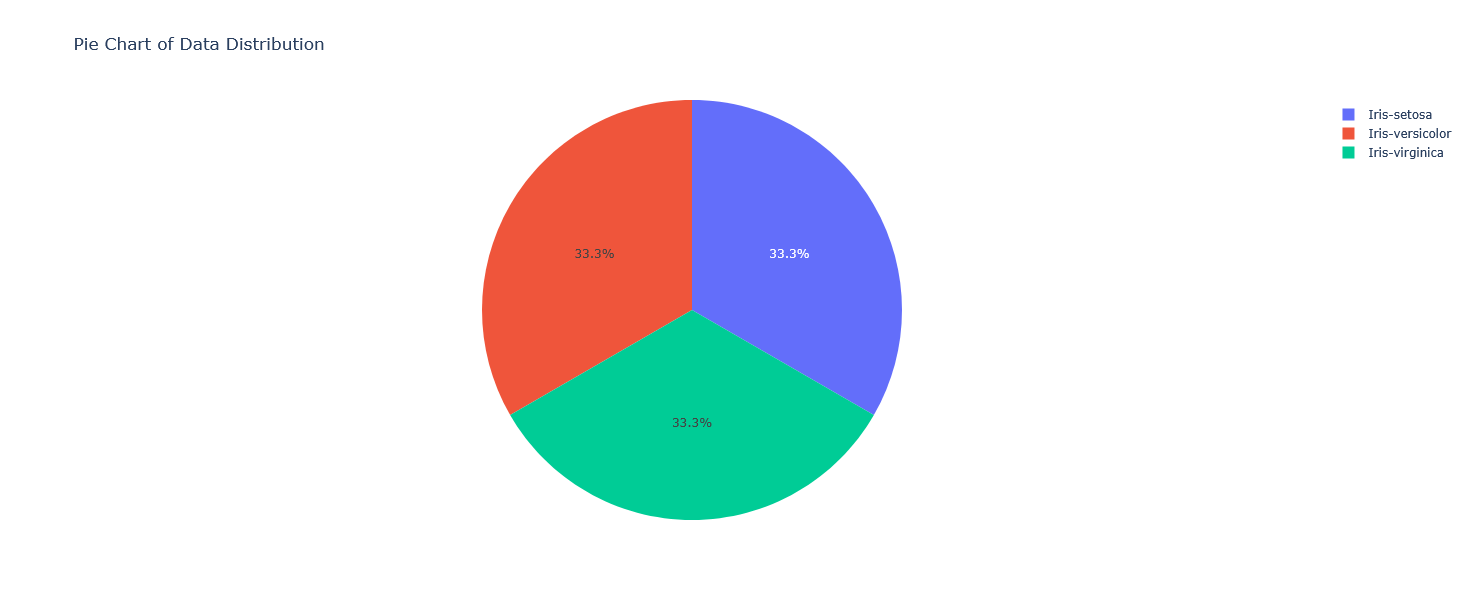

In [81]:
#EDA
fig = px.pie(df, 'Species',title='Pie Chart of Data Distribution',width=800, height=600)
fig.show()

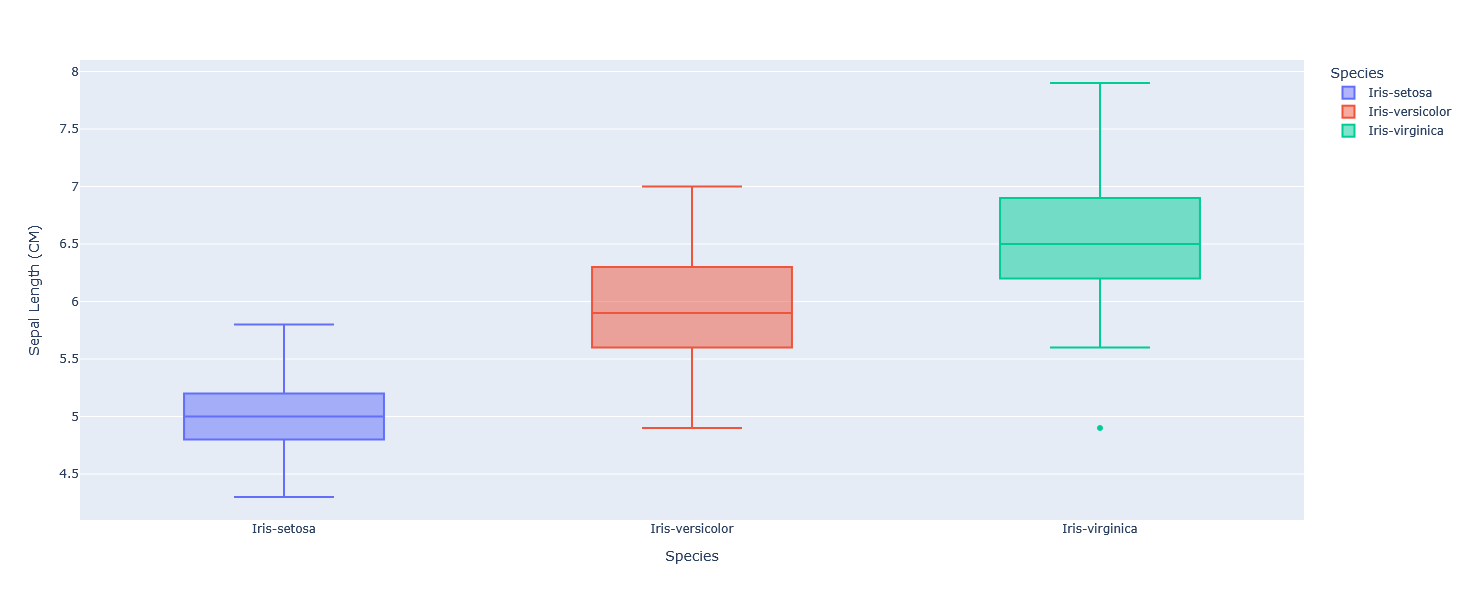

In [77]:
#Setosa has the Smallest Sepal Length, Versicolor and Virginica have similar but Virginica has highest
fig = px.box(data_frame=df, x='Species',y='SepalLengthCm',color='Species', orientation='v',width=800, height=600).update_layout(xaxis_title="Species", yaxis_title="Sepal Length (CM)")
 
fig.show()

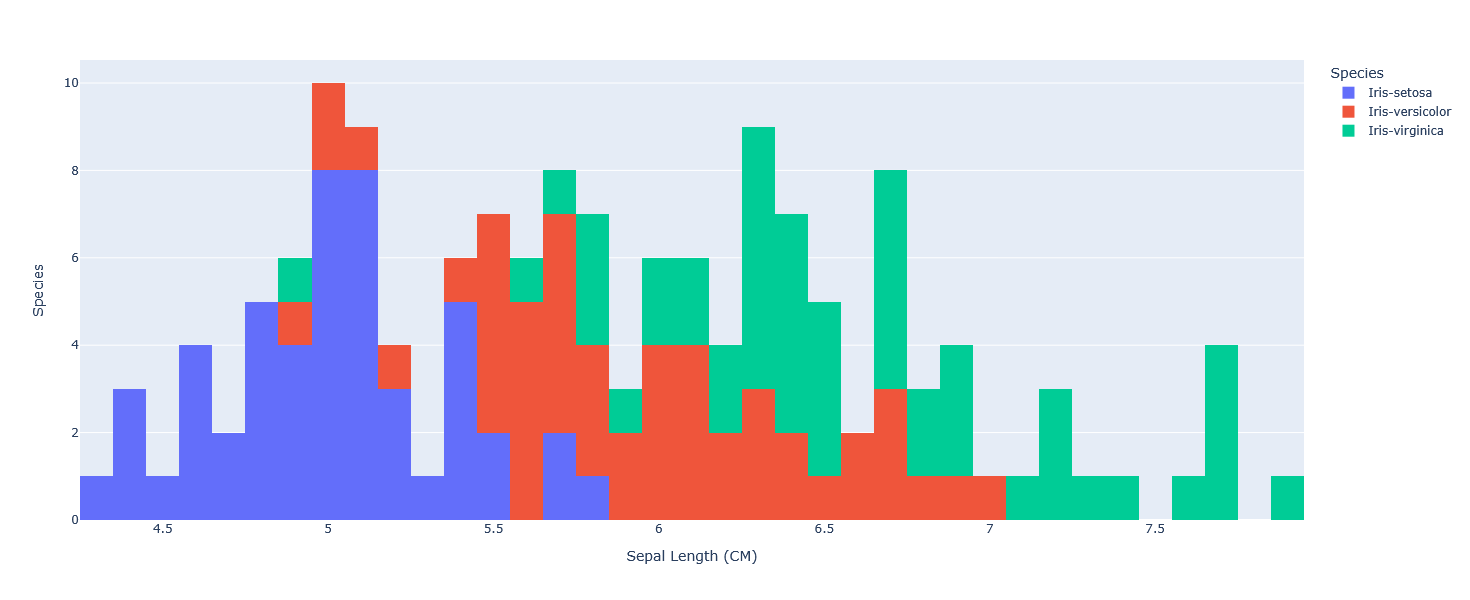

In [78]:
fig = px.histogram(data_frame=df, x='SepalLengthCm',color='Species', nbins=50,width=800, height=600).update_layout(xaxis_title="Sepal Length (CM)", yaxis_title="Species")
fig.show()

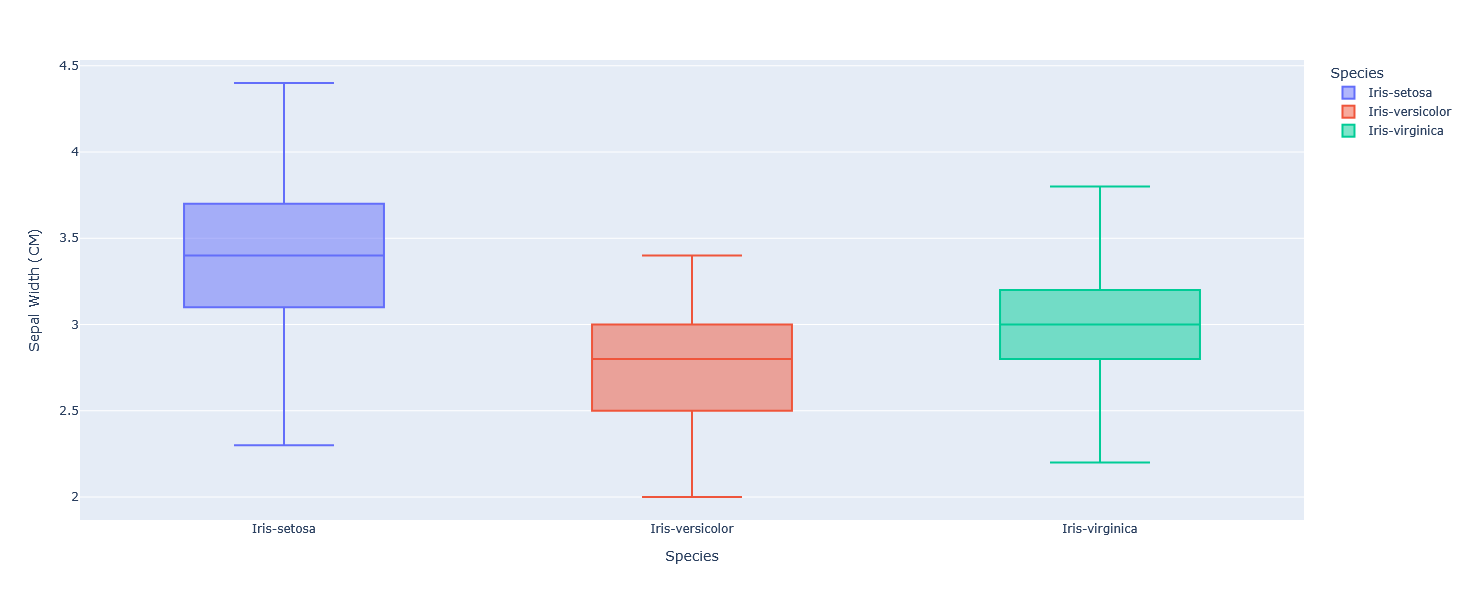

In [82]:
#Setosa has the Highest Sepal Width, Versicolor and Virginica have similar but Versicolor has smallest by average
fig = px.box(data_frame=df, x='Species',y='SepalWidthCm',color='Species',orientation='v',width=800, height=600).update_layout(xaxis_title="Species", yaxis_title="Sepal Width (CM)")
fig.show()

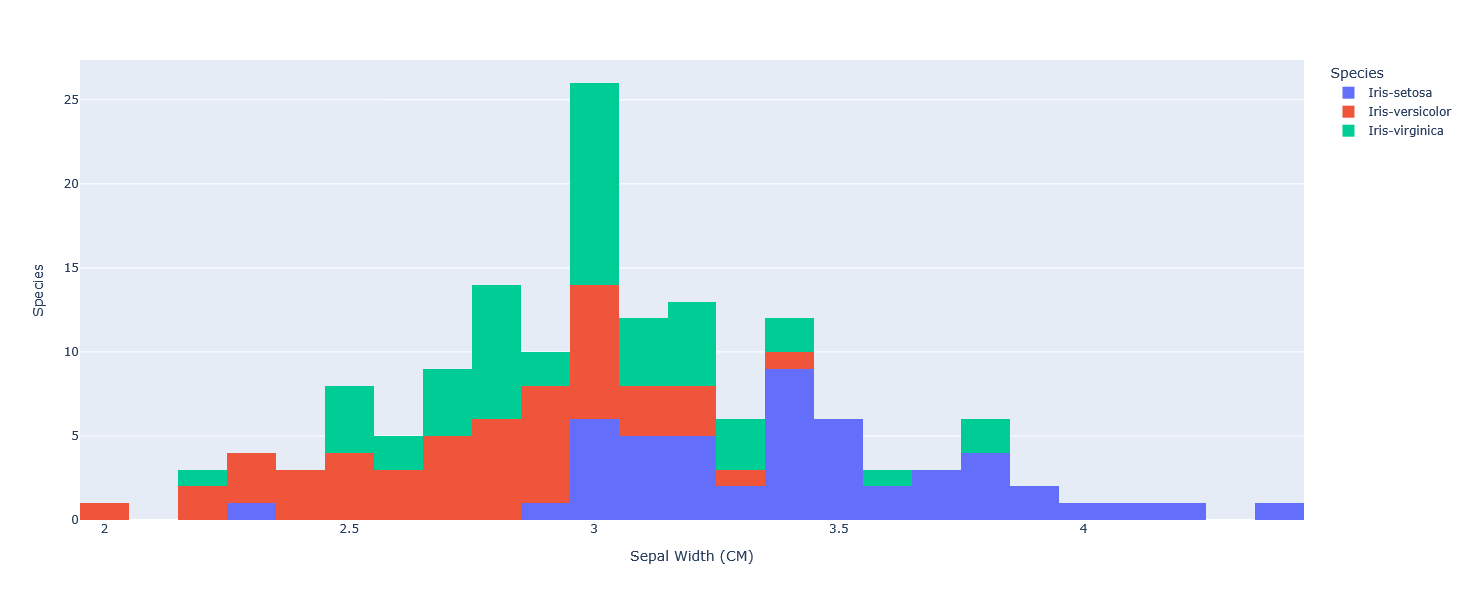

In [79]:
fig = px.histogram(data_frame=df, x='SepalWidthCm',color='Species',nbins=30,width=800, height=600).update_layout(xaxis_title="Sepal Width (CM)", yaxis_title="Species")
fig.show()

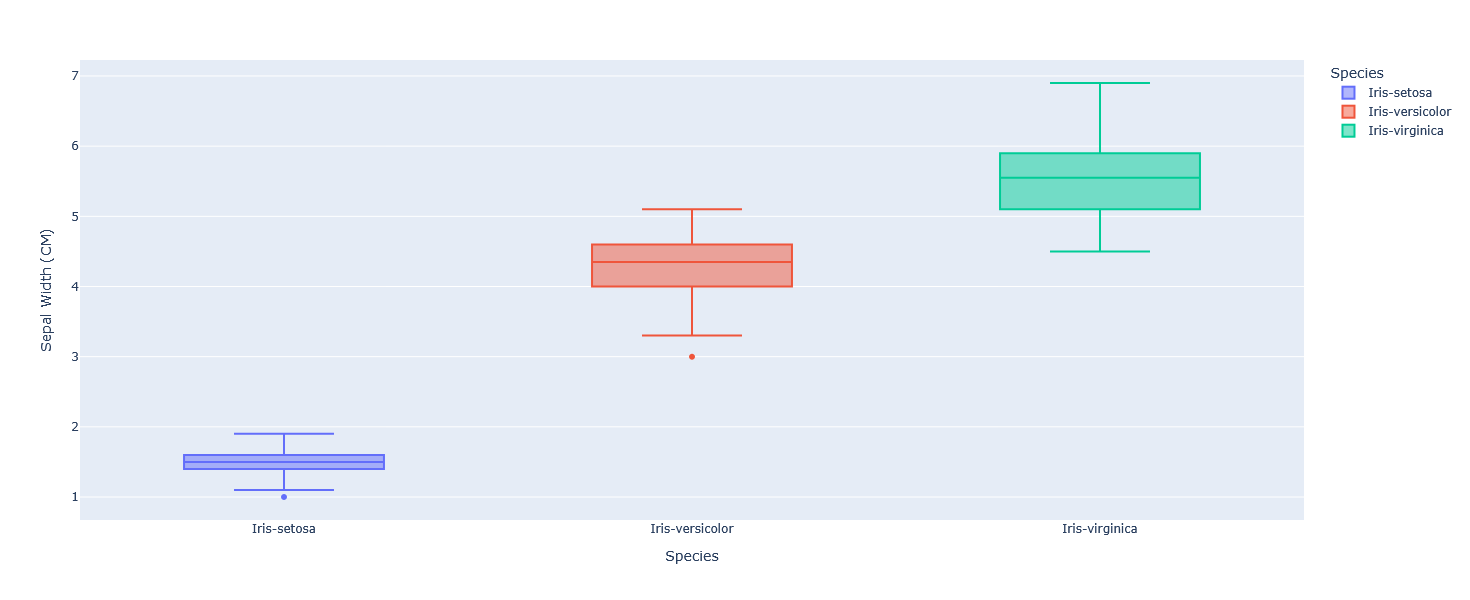

In [83]:
#Setosa has the Smallest Petal Lenth, Versicolor and Virginica have similar but Virginica has the highest 
fig = px.box(data_frame=df, x='Species',y='PetalLengthCm',color='Species',orientation='v',width=800, height=600).update_layout(xaxis_title="Species", yaxis_title="Sepal Width (CM)")
fig.show()

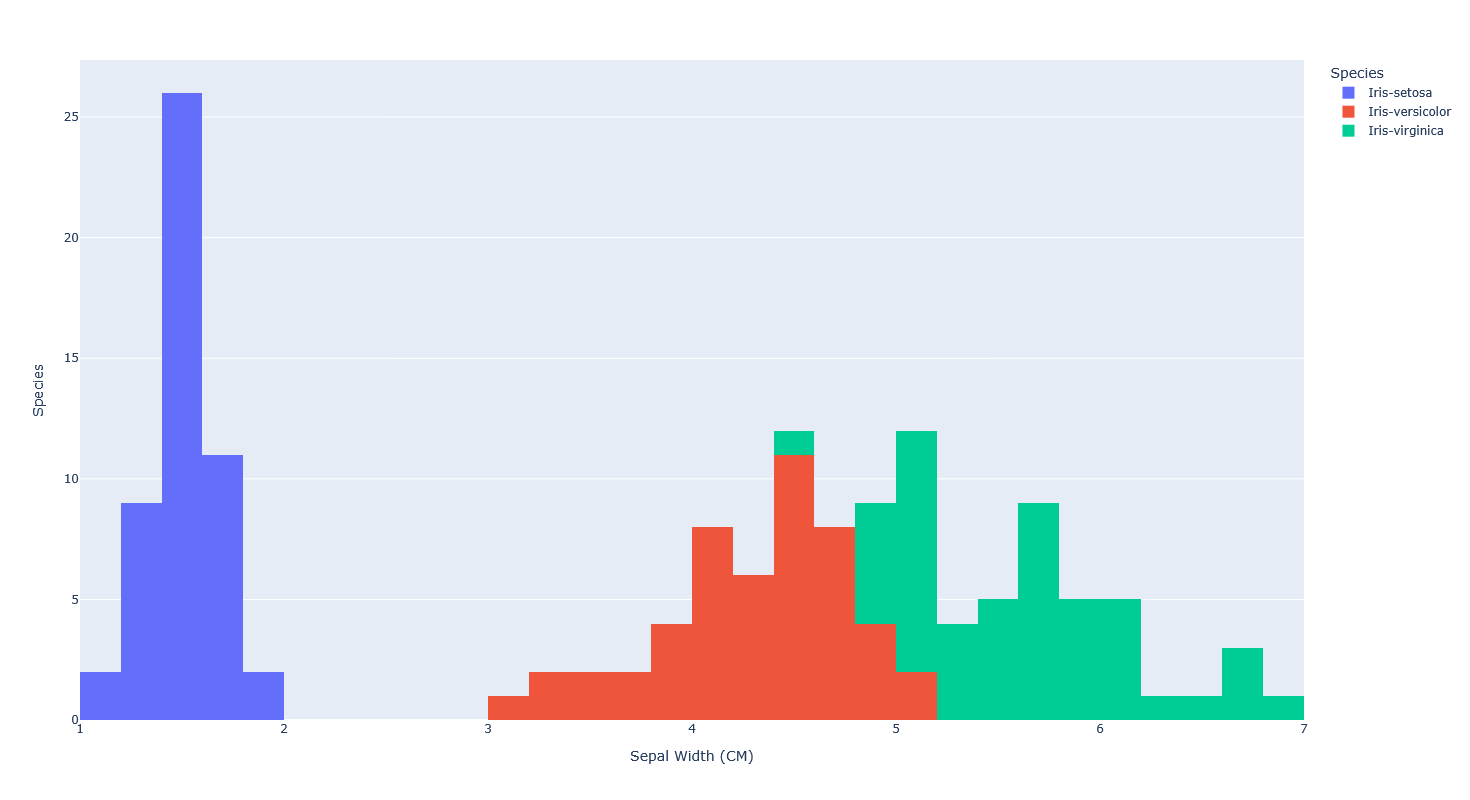

In [80]:
fig = px.histogram(data_frame=df, x='PetalLengthCm',color='Species',nbins=30,width=800, height=800).update_layout(xaxis_title="Sepal Width (CM)", yaxis_title="Species")
fig.show()

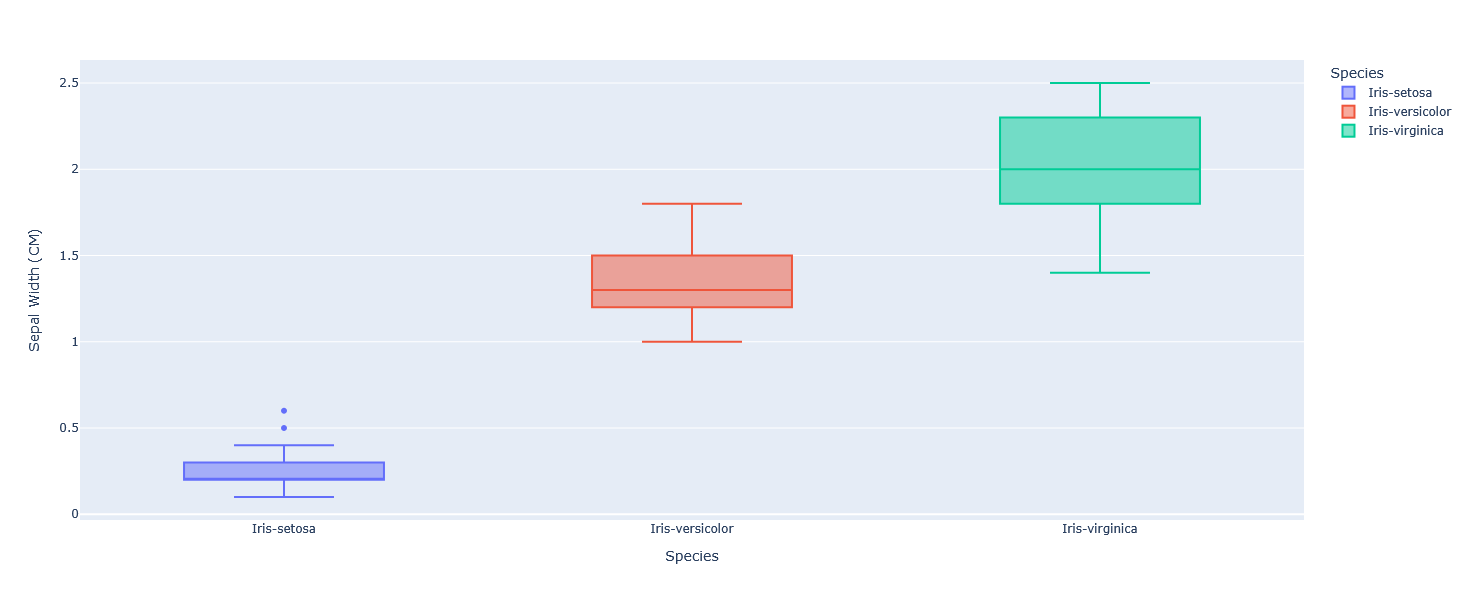

In [75]:
#Setosa has the Smallest Petal Width, Virginica has the highest 
fig = px.box(data_frame=df, x='Species',y='PetalWidthCm',color='Species',orientation='v',width=800, height=600).update_layout(xaxis_title="Species", yaxis_title="Sepal Width (CM)")
fig.show()

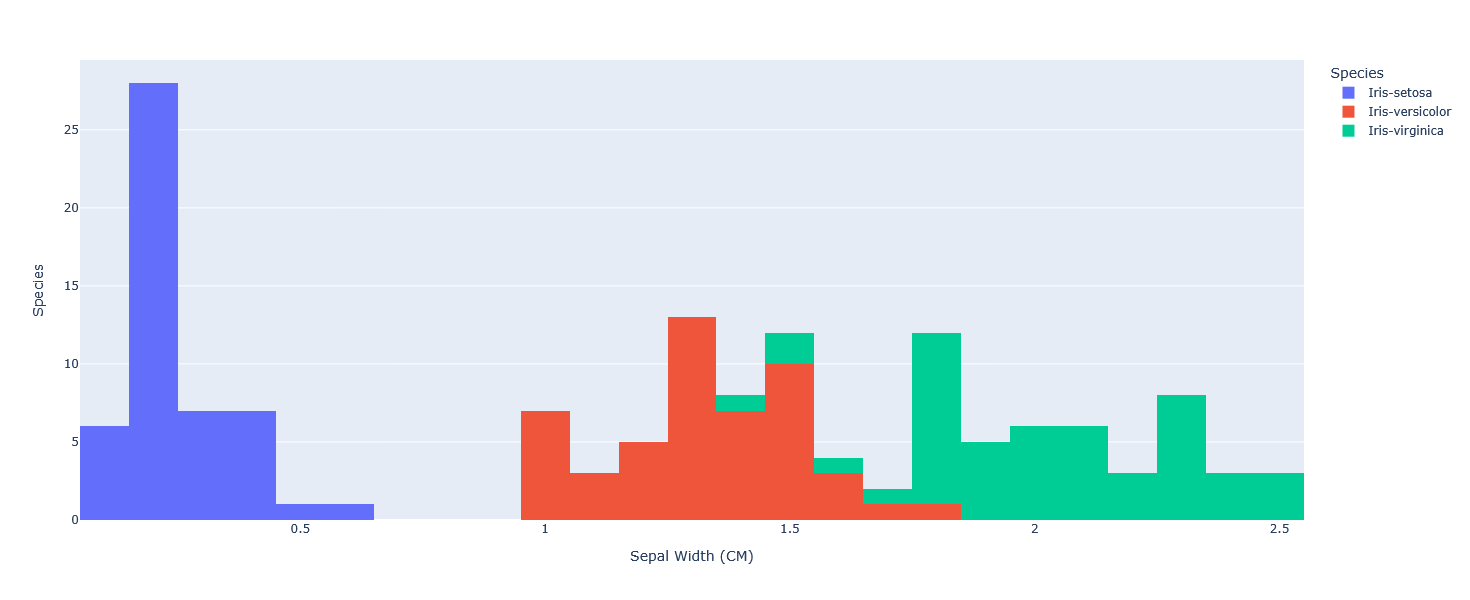

In [74]:
fig = px.histogram(data_frame=df, x='PetalWidthCm',color='Species',nbins=30,width=800, height=600).update_layout(xaxis_title="Sepal Width (CM)", yaxis_title="Species")
fig.show()

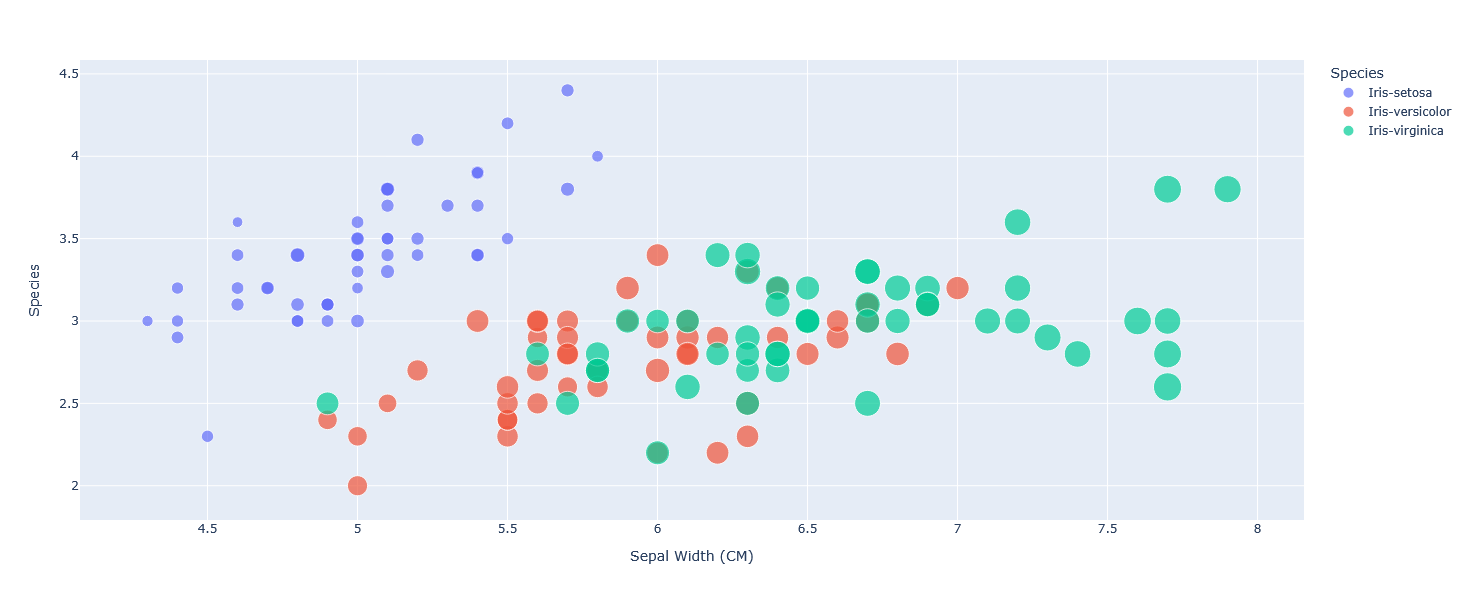

In [73]:
fig = px.scatter(data_frame=df, x='SepalLengthCm',y='SepalWidthCm',color='Species',size='PetalLengthCm',width=800, height=600).update_layout(xaxis_title="Sepal Width (CM)", yaxis_title="Species")
fig.show()

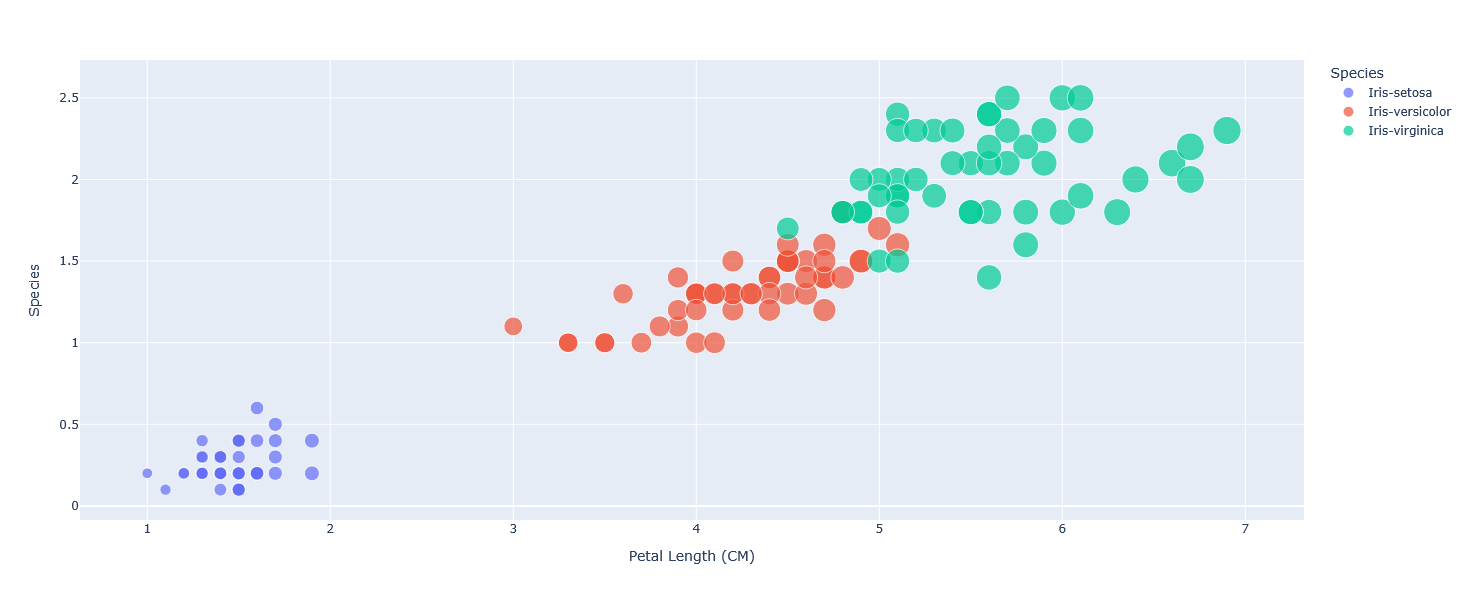

In [72]:
fig = px.scatter(data_frame=df, x='PetalLengthCm',y='PetalWidthCm',color='Species',size='PetalLengthCm',width=800, height=600).update_layout(xaxis_title="Petal Length (CM)", yaxis_title="Species")

fig.show()

In [89]:
print("Class Labels:", df['Species'].unique())

Class Labels: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [90]:
X=df.drop([ 'Species'], axis=1)
Y=df['Species']

In [91]:
# Create scaler object
scaler = StandardScaler()

# Fit on X and transform it
X_scaled = scaler.fit_transform(X)

In [92]:
# Before scaling
print("Before Scaling:")
print(X.describe())

# After scaling (convert back to DataFrame for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nAfter Scaling:")
print(X_scaled_df.describe())

Before Scaling:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

After Scaling:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count   1.500000e+02  1.500000e+02   1.500000e+02  1.500000e+02
mean   -4.736952e-16 -6.631732e-16   3.315866e-16 -2.842171e-16
std     1.003350e+00  1.003350e+00   1.003350e+00  1.003350e+00
min    -1.870024e+00 -2.438987e+00  -1.568735e+00 -1.444450e+00
25%    -9.006812e-01 -5.877635e-01  -1.227541e+00 -1.181504e+00
50%    -

In [93]:
# Use the scaled feature matrix X_scaled and labels y
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=42
)

# Optional: check the sizes
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 120
Testing set size: 30


In [94]:
# Initialize the classifier with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model (actually, it stores the training data)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
Y_pred = knn.predict(X_test)
print("Predictions:", Y_pred[:5])

Predictions: ['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor']


In [97]:
# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



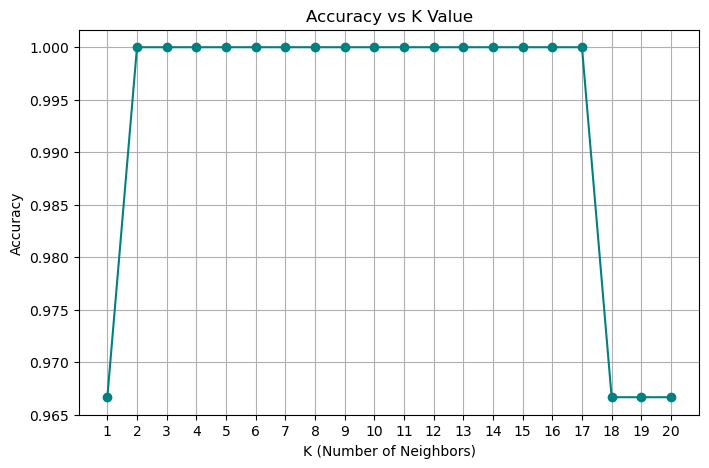

In [101]:
#K Value >= 2 <=18 produces a 100% accuracy
# Range of K values to test
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred_k = knn.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_k)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='teal')
plt.xticks(k_values)
plt.title("Accuracy vs K Value")
plt.xlabel("K (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

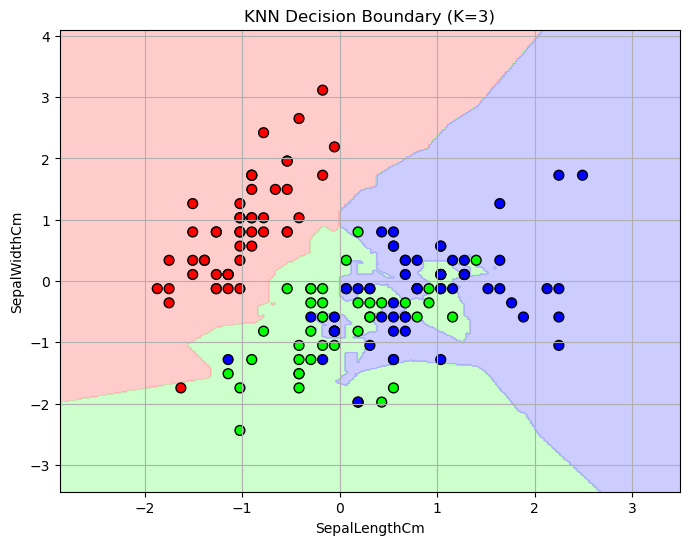

In [99]:
# Select only 2 features (for 2D visualization)
features = ['SepalLengthCm', 'SepalWidthCm']  
X_vis = df[features]
y_vis = df['Species']

# Encode labels (if they are strings like 'setosa')
y_vis_encoded = y_vis.astype('category').cat.codes

# Normalize
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.2, random_state=42
)

# Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vis, y_train_vis)

# Create meshgrid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis_encoded, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()

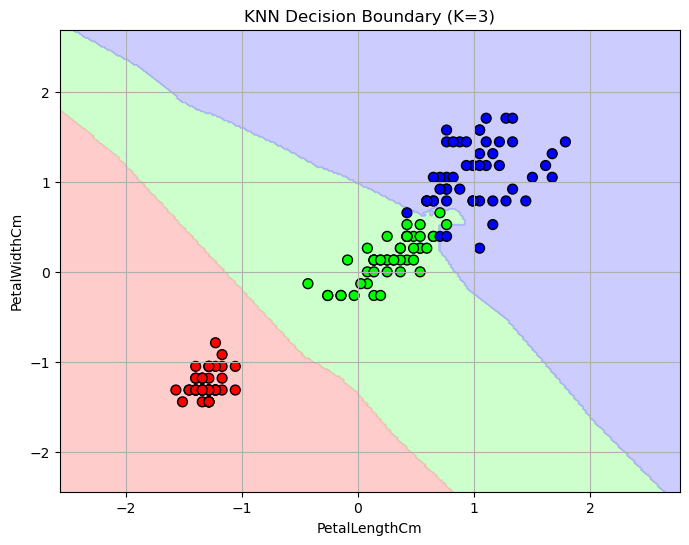

In [100]:
# Select only 2 features (for 2D visualization)
features = ['PetalLengthCm', 'PetalWidthCm']  
X_vis = df[features]
y_vis = df['Species']

# Encode labels (if they are strings like 'setosa')
y_vis_encoded = y_vis.astype('category').cat.codes

# Normalize
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# Split
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis_encoded, test_size=0.2, random_state=42
)

# Train KNN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_vis, y_train_vis)

# Create meshgrid
h = 0.02
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis_encoded, cmap=cmap_bold, edgecolor='k', s=50)
plt.title(f"KNN Decision Boundary (K={k})")
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.grid(True)
plt.show()